In [1]:
import matplotlib.pyplot as plt
import MDAnalysis as mda
import numpy as np
from MDAnalysis.analysis import distances
from numpy.linalg import norm
import pprint, pickle
from scipy.stats import gaussian_kde
import sys
sys.path.append('../') ## to get src lib
import src.functions_analysis as analysis

In [2]:
#Here for GLUT3, check src.functions_analysis for numbering
TR_angle=[(58,62),(82,86),(305,309),(325,329)]

In [3]:
#Using here GLUT3 simulations published in Qureshi et al. Nature (2020)
dir="glut3/"
protname="glut3_holo"

In [5]:
for i in range(1,4):
    u = mda.Universe(dirgro+protname+str(i)+".start.gro",\
                    dirtraj+protname+str(i)+".skip250.xtc")   
    TR=analysis.TRangle(u,TR_angle)
    output1 = open('TR%s.pkl'%i, 'wb')
    pickle.dump(np.asarray(TR), output1)
    output1.close()

1006
1006
1006


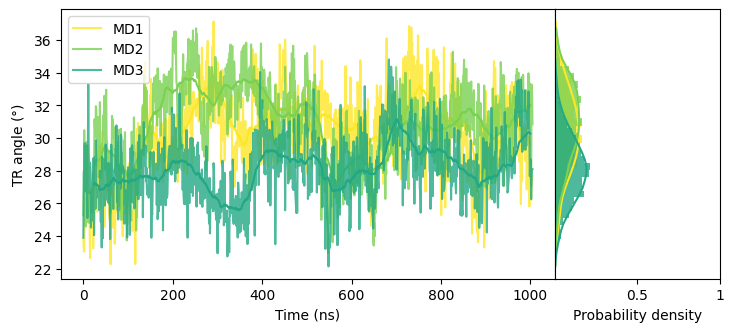

In [6]:
colors = plt.cm.viridis_r(np.linspace(0, 1, 6))
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(8.5,3.5))

for i in range(1,4):
    with open('TR%s.pkl'%i,"rb") as f:
        g = np.asarray(pickle.load(f))

    print (np.shape(g)[0]+1)
    axs[0].plot(np.linspace(0,np.shape(g)[0],np.shape(g)[0]),g,color=colors[i-1], alpha=0.8, label='MD%s' %i)
    axs[0].plot(np.linspace((50 - 1) / 2,1000,956),np.convolve(g, np.ones(50)/50, mode='valid'), color=colors[i-1])

    axs[1].hist(g,color=colors[i-1], label=i, alpha=0.8, density=True, bins=30, orientation='horizontal')
    kde_sp = gaussian_kde(g, bw_method='scott')     
    eval_points=np.linspace(np.min(g),np.max(g),30)
    y_sp = kde_sp.pdf(eval_points)
    plt.plot( y_sp,eval_points,color=colors[i-1])
axs[0].legend()
axs[1].set_yticks([])
axs[1].set_xticks([0.5,1],[0.5,1])
plt.subplots_adjust(wspace=0, hspace=0)

axs[0].set_ylabel(f'TR angle ($°$)')
axs[0].set_xlabel(f'Time (ns)')
axs[1].set_xlabel(f'Probability density')
#axs[0].set_ylim(8.,20)
#axs[1].set_ylim(8.,20)
fig.savefig('figures/TRangle_GLUT3_replicas.png', bbox_inches='tight')